## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 3072)
x_test shape:  (10000, 3072)
y_train shape:  (50000, 10)
y_test shape:  (10000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.8, 0.85, 0.9, 0.95]

In [8]:
import itertools
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE ,MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.80
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/

50000/50000 [==============================] - 10s 209us/step - loss: 0.9024 - acc: 0.6730 - val_loss: 1.7418 - val_acc: 0.4905
Experiment with LR = 0.100000, Momentum = 0.85
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121u

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.0592 - acc: 0.2366 - val_loss: 2.1607 - val_acc: 0.2719
Epoch 2/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.8807 - acc: 0.3143 - val_loss: 1.8711 - val_acc: 0.3324
Epoch 3/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.8317 - acc: 0.3381 - val_loss: 1.7792 - val_acc: 0.3524
Epoch 4/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7699 - acc: 0.3578 - val_loss: 1.7490 - val_acc: 0.3653
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7198 - acc: 0.3822 - val_loss: 1.8595 - val_acc: 0.3520
Epoch 6/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.6809 - acc: 0.3984 - val_loss: 1.6972 - val_acc: 0.3898
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6627 - acc: 0.4051 - val_loss: 1.

50000/50000 [==============================] - 11s 217us/step - loss: 1.9039 - acc: 0.3180 - val_loss: 1.8632 - val_acc: 0.3476
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.7134 - acc: 0.3933 - val_loss: 1.6607 - val_acc: 0.4107
Epoch 3/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6285 - acc: 0.4249 - val_loss: 1.6127 - val_acc: 0.4318
Epoch 4/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5675 - acc: 0.4464 - val_loss: 1.6268 - val_acc: 0.4152
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5201 - acc: 0.4650 - val_loss: 1.6301 - val_acc: 0.4257
Epoch 6/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4818 - acc: 0.4773 - val_loss: 1.4908 - val_acc: 0.4649
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4475 - acc: 0.4898 - val_loss: 1.4771 - val_acc: 0.4687
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6798 - acc: 0.4031 - val_loss: 1.6961 - val_acc: 0.3897
Epoch 3/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5960 - acc: 0.4371 - val_loss: 1.6488 - val_acc: 0.4095
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5345 - acc: 0.4593 - val_loss: 1.7468 - val_acc: 0.3917
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4842 - acc: 0.4754 - val_loss: 1.5361 - val_acc: 0.4595
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4466 - acc: 0.4895 - val_loss: 1.4829 - val_acc: 0.4666
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4080 - acc: 0.5000 - val_loss: 1.4775 - val_acc: 0.4712
Epoch 8/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.3774 - acc: 0.5125 - val_loss: 1.6212 - val_acc: 0.4173
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 11s 222us/step - loss: 1.6392 - acc: 0.4193 - val_loss: 1.7641 - val_acc: 0.3742
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5527 - acc: 0.4484 - val_loss: 1.5549 - val_acc: 0.4496
Epoch 4/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.4873 - acc: 0.4734 - val_loss: 1.5432 - val_acc: 0.4492
Epoch 5/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.4386 - acc: 0.4885 - val_loss: 1.4960 - val_acc: 0.4637
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.3940 - acc: 0.5040 - val_loss: 1.4591 - val_acc: 0.4789
Epoch 7/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.3616 - acc: 0.5166 - val_loss: 1.4836 - val_acc: 0.4693
Epoch 8/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3254 - acc: 0.5312 - val_loss: 1.4543 - val_acc: 0.4813
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.5137 - acc: 0.4647 - val_loss: 1.5212 - val_acc: 0.4606
Epoch 4/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.4534 - acc: 0.4840 - val_loss: 1.5346 - val_acc: 0.4573
Epoch 5/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.4039 - acc: 0.5015 - val_loss: 1.4201 - val_acc: 0.4960
Epoch 6/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.3549 - acc: 0.5194 - val_loss: 1.4054 - val_acc: 0.4990
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.3258 - acc: 0.5305 - val_loss: 1.4132 - val_acc: 0.5006
Epoch 8/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.2945 - acc: 0.5410 - val_loss: 1.3943 - val_acc: 0.4977
Epoch 9/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.2627 - acc: 0.5532 - val_loss: 1.4414 - val_acc: 0.4903
Epoch 10/50
50000/50000 [==

50000/50000 [==============================] - 11s 228us/step - loss: 1.9005 - acc: 0.3366 - val_loss: 1.8678 - val_acc: 0.3454
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.8503 - acc: 0.3549 - val_loss: 1.8283 - val_acc: 0.3664
Epoch 5/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8132 - acc: 0.3685 - val_loss: 1.7959 - val_acc: 0.3730
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7822 - acc: 0.3804 - val_loss: 1.7646 - val_acc: 0.3892
Epoch 7/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.7567 - acc: 0.3893 - val_loss: 1.7419 - val_acc: 0.3930
Epoch 8/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7329 - acc: 0.3984 - val_loss: 1.7246 - val_acc: 0.3972
Epoch 9/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7126 - acc: 0.4052 - val_loss: 1.7012 - val_acc: 0.4065
Epoch 10/50
50000/50000 [=============

50000/50000 [==============================] - 11s 215us/step - loss: 1.8503 - acc: 0.3518 - val_loss: 1.8275 - val_acc: 0.3643
Epoch 4/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.8041 - acc: 0.3715 - val_loss: 1.7920 - val_acc: 0.3722
Epoch 5/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.7683 - acc: 0.3829 - val_loss: 1.7511 - val_acc: 0.3881
Epoch 6/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7381 - acc: 0.3946 - val_loss: 1.7292 - val_acc: 0.3976
Epoch 7/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.7119 - acc: 0.4032 - val_loss: 1.7053 - val_acc: 0.4004
Epoch 8/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6890 - acc: 0.4127 - val_loss: 1.6798 - val_acc: 0.4164
Epoch 9/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6670 - acc: 0.4188 - val_loss: 1.6719 - val_acc: 0.4141
Epoch 10/50
50000/50000 [=============

Epoch 4/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.7518 - acc: 0.3893 - val_loss: 1.7372 - val_acc: 0.3891
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7101 - acc: 0.4032 - val_loss: 1.6996 - val_acc: 0.4032
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.6749 - acc: 0.4161 - val_loss: 1.6653 - val_acc: 0.4170
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.6443 - acc: 0.4249 - val_loss: 1.6439 - val_acc: 0.4272
Epoch 8/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6181 - acc: 0.4364 - val_loss: 1.6143 - val_acc: 0.4359
Epoch 9/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5957 - acc: 0.4427 - val_loss: 1.6020 - val_acc: 0.4398
Epoch 10/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5739 - acc: 0.4504 - val_loss: 1.5777 - val_acc: 0.4428
Epoch 11/50
50000/50000 [=

50000/50000 [==============================] - 11s 225us/step - loss: 1.6583 - acc: 0.4188 - val_loss: 1.6455 - val_acc: 0.4268
Epoch 5/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.6130 - acc: 0.4353 - val_loss: 1.6079 - val_acc: 0.4345
Epoch 6/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5749 - acc: 0.4493 - val_loss: 1.5762 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5405 - acc: 0.4600 - val_loss: 1.5429 - val_acc: 0.4527
Epoch 8/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5100 - acc: 0.4712 - val_loss: 1.5426 - val_acc: 0.4574
Epoch 9/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.4839 - acc: 0.4793 - val_loss: 1.5100 - val_acc: 0.4656
Epoch 10/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.4572 - acc: 0.4889 - val_loss: 1.4824 - val_acc: 0.4692
Epoch 11/50
50000/50000 [============

Epoch 5/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.1492 - acc: 0.2330 - val_loss: 2.1361 - val_acc: 0.2391
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1231 - acc: 0.2418 - val_loss: 2.1110 - val_acc: 0.2555
Epoch 7/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.1005 - acc: 0.2539 - val_loss: 2.0900 - val_acc: 0.2665
Epoch 8/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.0808 - acc: 0.2631 - val_loss: 2.0717 - val_acc: 0.2780
Epoch 9/50
50000/50000 [==============================] - 12s 245us/step - loss: 2.0635 - acc: 0.2742 - val_loss: 2.0549 - val_acc: 0.2851
Epoch 10/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.0476 - acc: 0.2829 - val_loss: 2.0396 - val_acc: 0.2905
Epoch 11/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.0328 - acc: 0.2886 - val_loss: 2.0254 - val_acc: 0.2966
Epoch 12/50
50000/50000 [

50000/50000 [==============================] - 11s 212us/step - loss: 2.0991 - acc: 0.2614 - val_loss: 2.0844 - val_acc: 0.2645
Epoch 6/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.0708 - acc: 0.2718 - val_loss: 2.0580 - val_acc: 0.2746
Epoch 7/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.0461 - acc: 0.2793 - val_loss: 2.0350 - val_acc: 0.2844
Epoch 8/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.0242 - acc: 0.2886 - val_loss: 2.0148 - val_acc: 0.2907
Epoch 9/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.0049 - acc: 0.2953 - val_loss: 1.9961 - val_acc: 0.2981
Epoch 10/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9875 - acc: 0.3011 - val_loss: 1.9799 - val_acc: 0.3024
Epoch 11/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9720 - acc: 0.3074 - val_loss: 1.9650 - val_acc: 0.3078
Epoch 12/50
50000/50000 [===========

Epoch 6/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.0034 - acc: 0.2943 - val_loss: 1.9933 - val_acc: 0.2955
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.9786 - acc: 0.3054 - val_loss: 1.9711 - val_acc: 0.3110
Epoch 8/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.9572 - acc: 0.3145 - val_loss: 1.9516 - val_acc: 0.3128
Epoch 9/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.9388 - acc: 0.3219 - val_loss: 1.9344 - val_acc: 0.3222
Epoch 10/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.9222 - acc: 0.3288 - val_loss: 1.9193 - val_acc: 0.3299
Epoch 11/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.9074 - acc: 0.3347 - val_loss: 1.9059 - val_acc: 0.3331
Epoch 12/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8942 - acc: 0.3390 - val_loss: 1.8929 - val_acc: 0.3374
Epoch 13/50
50000/50000 

50000/50000 [==============================] - 10s 204us/step - loss: 1.9246 - acc: 0.3249 - val_loss: 1.9120 - val_acc: 0.3266
Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.9013 - acc: 0.3347 - val_loss: 1.8913 - val_acc: 0.3387
Epoch 8/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.8812 - acc: 0.3431 - val_loss: 1.8749 - val_acc: 0.3440
Epoch 9/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8646 - acc: 0.3495 - val_loss: 1.8584 - val_acc: 0.3493
Epoch 10/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8496 - acc: 0.3555 - val_loss: 1.8438 - val_acc: 0.3554
Epoch 11/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8356 - acc: 0.3598 - val_loss: 1.8312 - val_acc: 0.3618
Epoch 12/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.8231 - acc: 0.3643 - val_loss: 1.8185 - val_acc: 0.3666
Epoch 13/50
50000/50000 [==========

50000/50000 [==============================] - 10s 210us/step - loss: 2.2677 - acc: 0.1561 - val_loss: 2.2634 - val_acc: 0.1628
Epoch 7/50
50000/50000 [==============================] - 11s 210us/step - loss: 2.2616 - acc: 0.1635 - val_loss: 2.2578 - val_acc: 0.1662
Epoch 8/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2561 - acc: 0.1708 - val_loss: 2.2527 - val_acc: 0.1714
Epoch 9/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2510 - acc: 0.1756 - val_loss: 2.2480 - val_acc: 0.1791
Epoch 10/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.2463 - acc: 0.1815 - val_loss: 2.2435 - val_acc: 0.1833
Epoch 11/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2419 - acc: 0.1862 - val_loss: 2.2392 - val_acc: 0.1895
Epoch 12/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.2377 - acc: 0.1905 - val_loss: 2.2351 - val_acc: 0.1941
Epoch 13/50
50000/50000 [==========

Epoch 7/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.2793 - acc: 0.1451 - val_loss: 2.2743 - val_acc: 0.1551
Epoch 8/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2727 - acc: 0.1520 - val_loss: 2.2679 - val_acc: 0.1606
Epoch 9/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2665 - acc: 0.1585 - val_loss: 2.2616 - val_acc: 0.1641
Epoch 10/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.2605 - acc: 0.1641 - val_loss: 2.2557 - val_acc: 0.1694
Epoch 11/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.2548 - acc: 0.1686 - val_loss: 2.2500 - val_acc: 0.1743
Epoch 12/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.2492 - acc: 0.1730 - val_loss: 2.2445 - val_acc: 0.1775
Epoch 13/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2438 - acc: 0.1780 - val_loss: 2.2392 - val_acc: 0.1848
Epoch 14/50
50000/50000

50000/50000 [==============================] - 11s 214us/step - loss: 2.2517 - acc: 0.1520 - val_loss: 2.2434 - val_acc: 0.1585
Epoch 8/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.2421 - acc: 0.1586 - val_loss: 2.2342 - val_acc: 0.1638
Epoch 9/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2332 - acc: 0.1640 - val_loss: 2.2257 - val_acc: 0.1703
Epoch 10/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2248 - acc: 0.1695 - val_loss: 2.2177 - val_acc: 0.1752
Epoch 11/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.2169 - acc: 0.1765 - val_loss: 2.2099 - val_acc: 0.1810
Epoch 12/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2092 - acc: 0.1816 - val_loss: 2.2024 - val_acc: 0.1857
Epoch 13/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.2017 - acc: 0.1874 - val_loss: 2.1950 - val_acc: 0.1898
Epoch 14/50
50000/50000 [=========

50000/50000 [==============================] - 10s 199us/step - loss: 2.2079 - acc: 0.2089 - val_loss: 2.1980 - val_acc: 0.2171
Epoch 8/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.1952 - acc: 0.2182 - val_loss: 2.1857 - val_acc: 0.2273
Epoch 9/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1831 - acc: 0.2269 - val_loss: 2.1740 - val_acc: 0.2335
Epoch 10/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.1714 - acc: 0.2341 - val_loss: 2.1627 - val_acc: 0.2432
Epoch 11/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.1602 - acc: 0.2415 - val_loss: 2.1519 - val_acc: 0.2485
Epoch 12/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1495 - acc: 0.2480 - val_loss: 2.1415 - val_acc: 0.2535
Epoch 13/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1391 - acc: 0.2536 - val_loss: 2.1314 - val_acc: 0.2612
Epoch 14/50
50000/50000 [=========

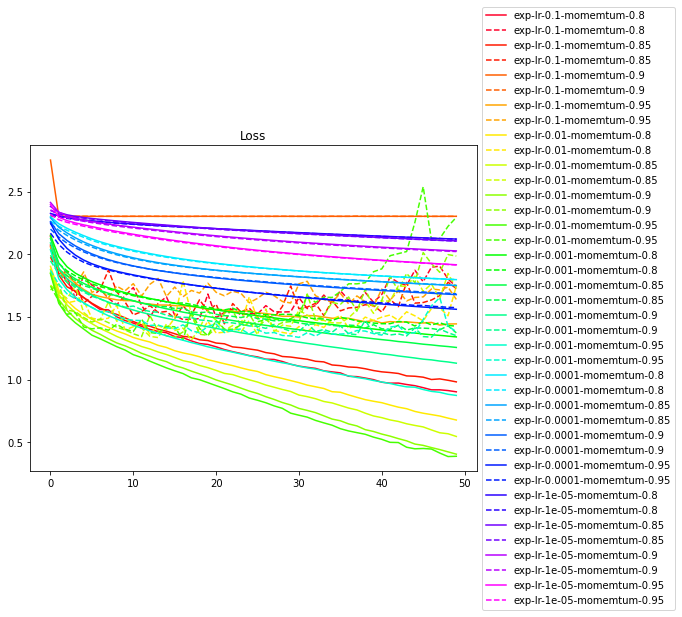

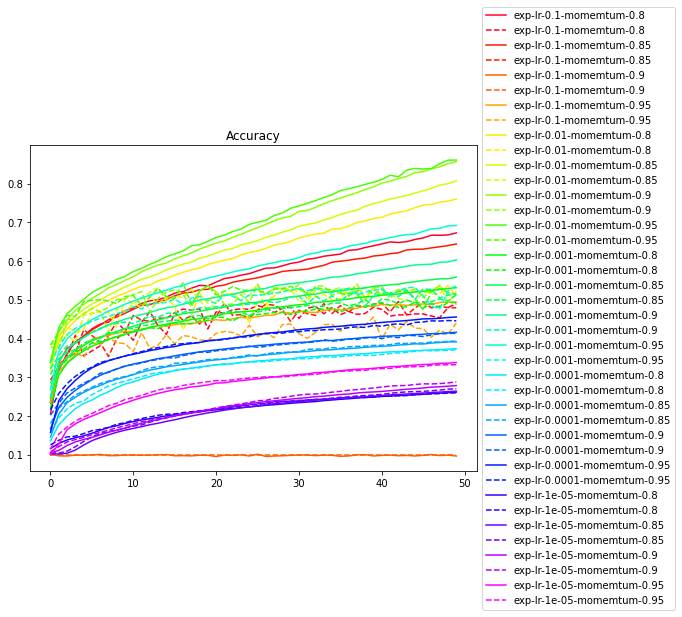

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()